# BHARAT INTERN TASK-1
             STOCK PREDICTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading Data

We have three data sets: `indexData`, `indexInfo`, and `indexProcessed`. The data and processed datasets have one difference: an extra column in the processed dataset that represents the local currency translated into USD.

In [2]:
data_df = pd.read_csv("../data/archive/indexData.csv")
info_df = pd.read_csv("../data/archive/indexInfo.csv")
processed_df = pd.read_csv("../data/archive/indexProcessed.csv")

# Preprocessing Data
From our three files, the important file is `indexProcessed` as that contains the most amount of relevant information to a regression. I also join the processed and info dataframes to collect all information at once.

In [3]:
processed_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [4]:
processed_df.columns.values

array(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume', 'CloseUSD'], dtype=object)

In [5]:
data_df.columns.values

array(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'], dtype=object)

In [6]:
set(processed_df.columns.values) - set(data_df.columns.values)

{'CloseUSD'}

In [7]:
info_df

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [8]:
processed_info_df = pd.merge(processed_df, info_df, on='Index')
processed_info_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,Hong Kong,Hong Kong Stock Exchange,HKD


In [9]:
processed_info_df['Date'] = pd.to_datetime(processed_info_df['Date'])
processed_info_df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD,Region,Exchange,Currency
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006,Hong Kong,Hong Kong Stock Exchange,HKD
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013,Hong Kong,Hong Kong Stock Exchange,HKD
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987,Hong Kong,Hong Kong Stock Exchange,HKD
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987,Hong Kong,Hong Kong Stock Exchange,HKD
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013,Hong Kong,Hong Kong Stock Exchange,HKD


# Exploratory Analysis
I create a heatmap and a pairplot of each of the features in `indexProcessed`. This shows that some fields are very highly correlated and some are not correlated whatsoever.

<AxesSubplot:>

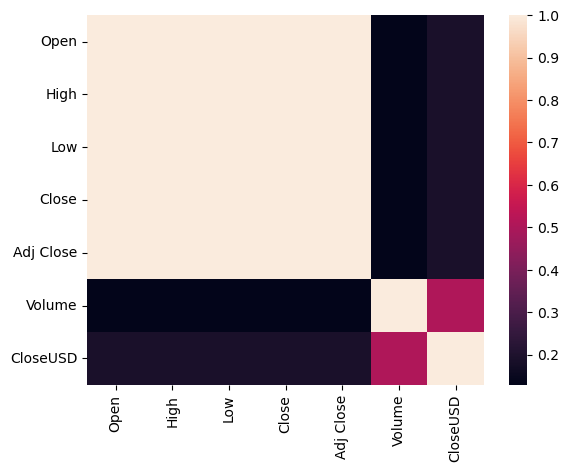

In [10]:
sns.heatmap(processed_info_df.corr())

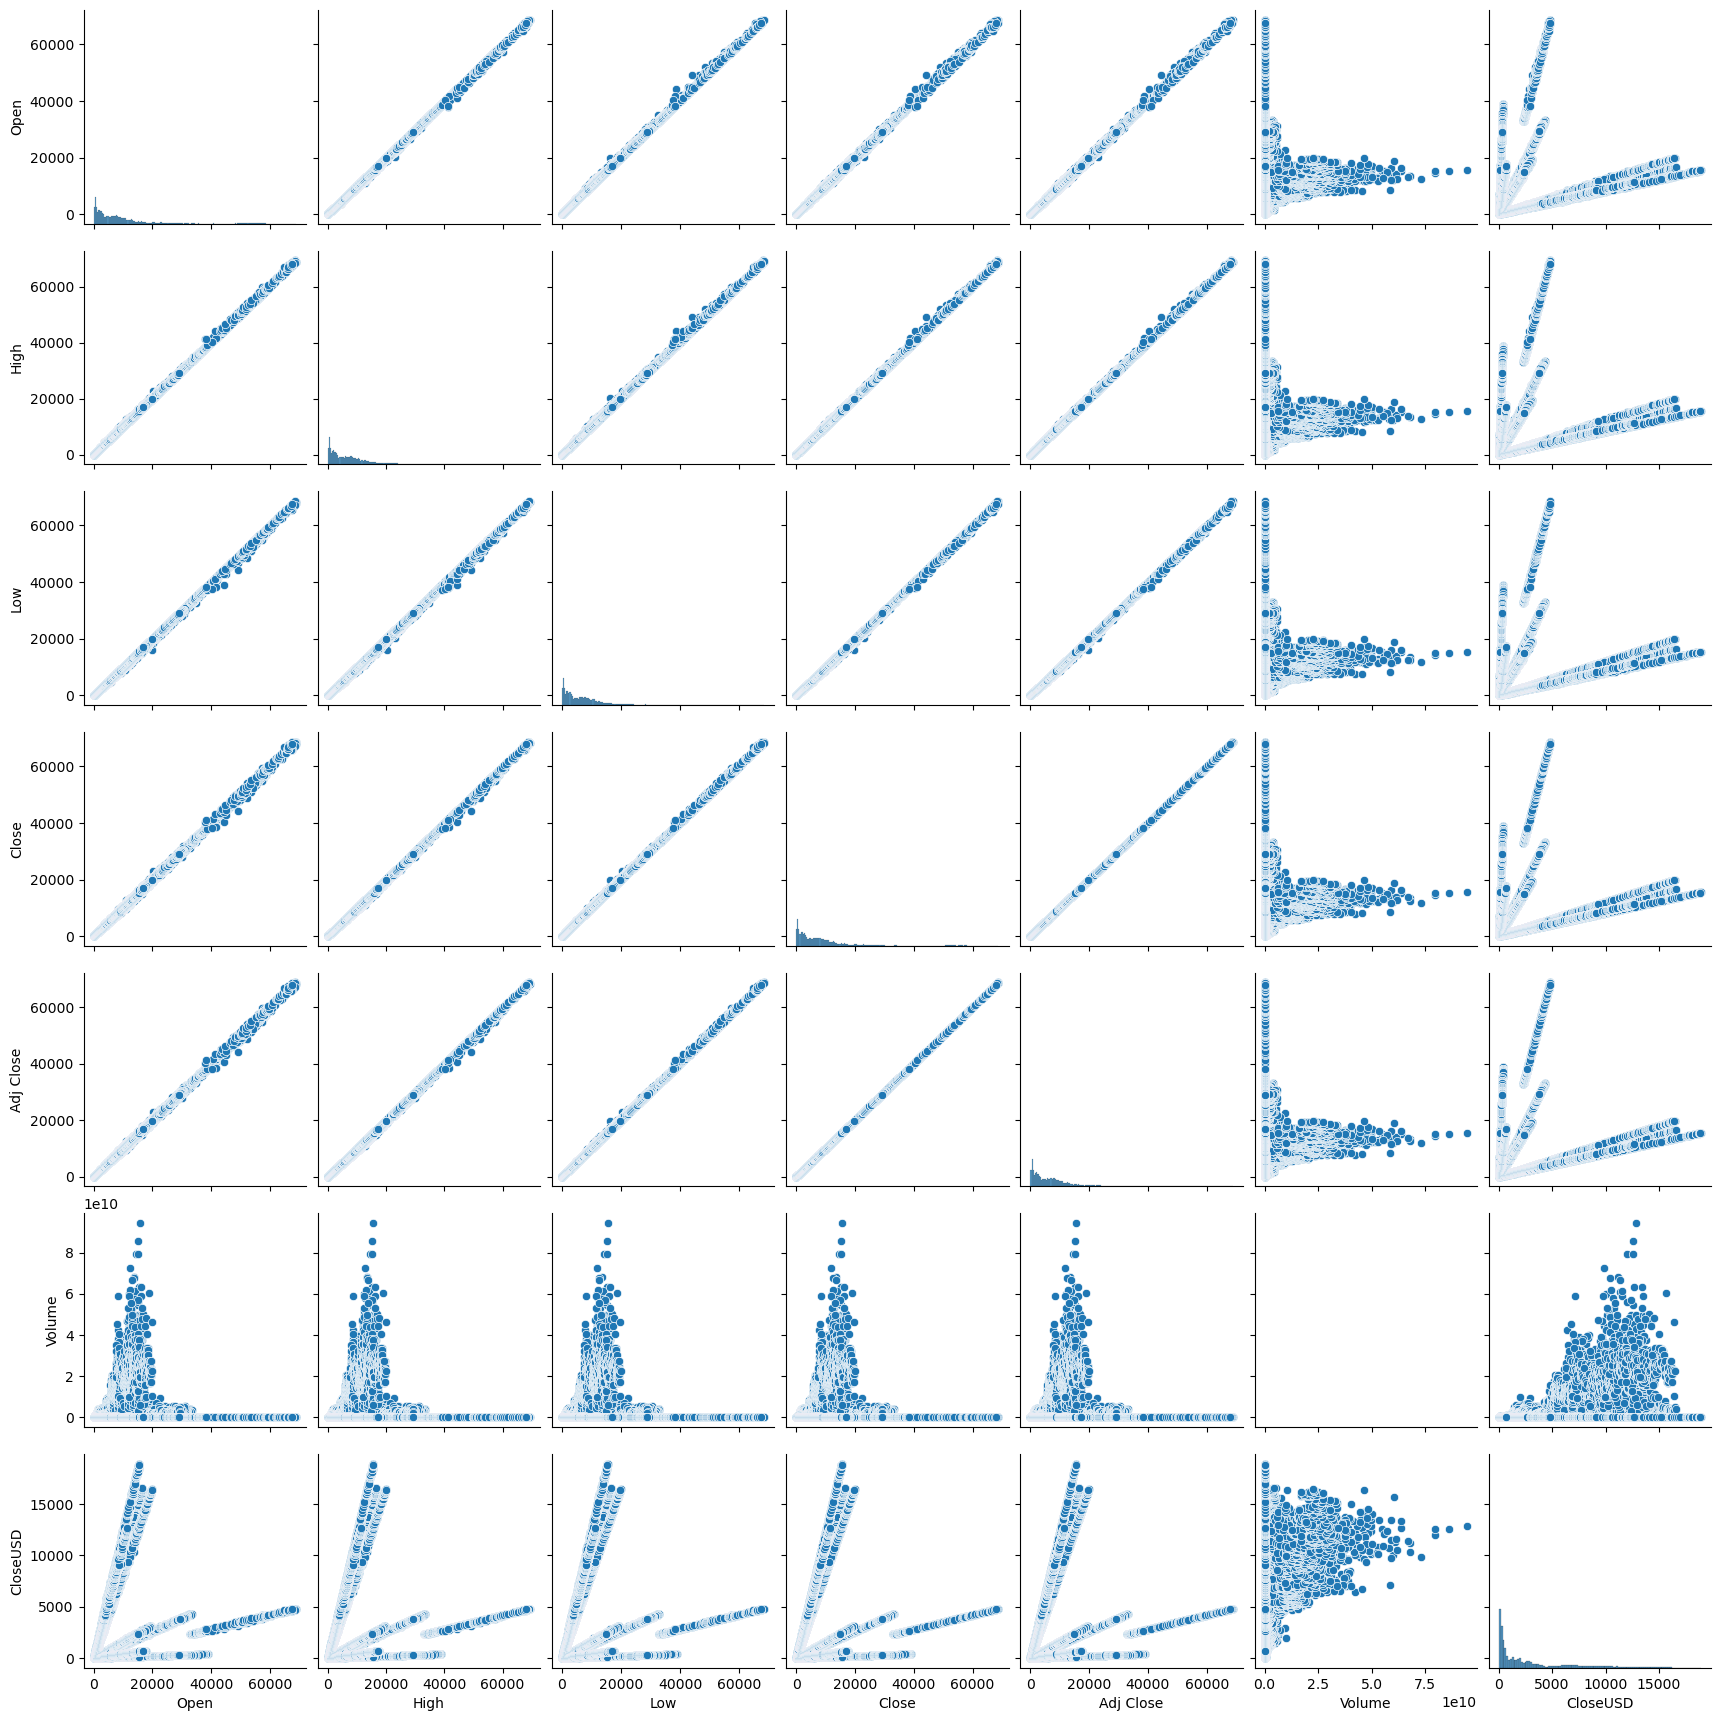

In [11]:
sns.pairplot(processed_info_df)

I then claculate the index with the highest return over the period recorded in the data set. The index with the highest return is by far `IXIC`, with 14,000% return from start to finish. If you invested £1,000 in 1971, that money would now be worth £140,000.

In [111]:
all_stocks = np.unique(processed_info_df['Index'])

<AxesSubplot:xlabel='Date', ylabel='CloseUSD'>

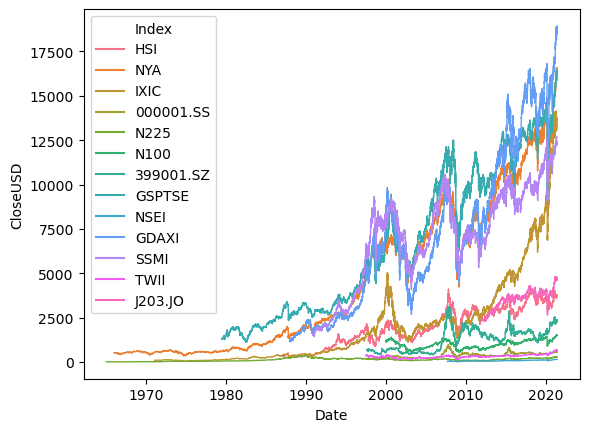

In [112]:
sns.lineplot(data=processed_info_df, x='Date', y='CloseUSD', hue='Index', lw=1)

In [113]:
stock_dfs = {}
for stock in all_stocks:
    data = processed_info_df[processed_info_df['Index'] == stock]
    data = data[['Date', 'CloseUSD']]
    data = data.set_index('Date')
    stock_dfs[stock] = data
stock_dfs['IXIC']

,CloseUSD
Date,
1971-02-05,100.000000
1971-02-08,100.839996
1971-02-09,100.760002
1971-02-10,100.690002
1971-02-11,101.449997
...,...
2021-05-24,13661.169920
2021-05-25,13657.169920
2021-05-26,13738.000000


In [114]:
stock_returns = {}

for name, df in stock_dfs.items():
    start_price = df[df.index == df.index.min()].iloc[0]['CloseUSD']
    final_price = df[df.index == df.index.max()].iloc[0]['CloseUSD']
    ret = (final_price / start_price) * 100
    stock_returns[name] = ret

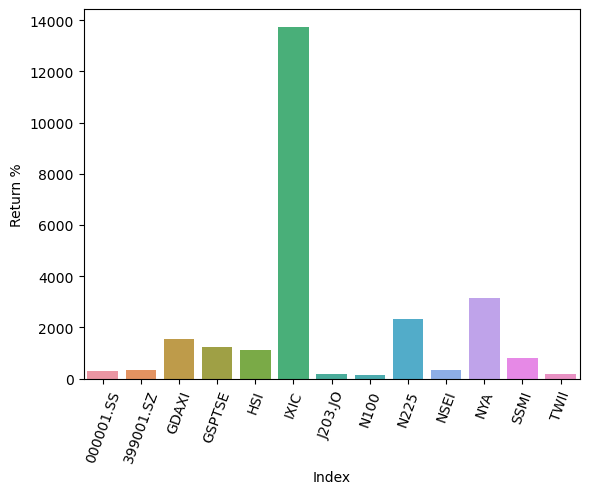

In [115]:
stock_returns_df = pd.DataFrame.from_dict(stock_returns, orient='index', columns=['Return %'])

ax = sns.barplot(data=stock_returns_df,x=stock_returns_df.index,y='Return %')
ax.set(xlabel='Index', ylabel='Return %')
plt.xticks(rotation=70)
plt.show()

# Preprocessing/Splitting Functions
These functions are the base for: 
 - Picking the feature columns;
 - Scaling the data;
 - Splitting data into train-test splits;
 - Splitting data into dependent-indepdent splits.

In [20]:
def pick_feature_columns(df):
    feature_columns = ['CloseUSD']
    df = df[feature_columns]
    return df

In [21]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scale_data(df):
    scaler = MinMaxScaler()
    scaled_close_usd = scaler.fit_transform(df[['CloseUSD']])
    df[['CloseUSD']] = scaled_close_usd
    return scaler, df

In [22]:
from sklearn.preprocessing import StandardScaler

def standard_scale_data(df):
    scaler = StandardScaler()
    scaled_close_usd = scaler.fit_transform(df[['CloseUSD']])
    df[['CloseUSD']] = scaled_close_usd
    return scaler, df

In [23]:
def train_test_split(df, training_split=0.8):
    training_days = (df.index.max() - df.index.min())*training_split
    cutoff_date = df.index.min() + training_days
    test_data = df[df.index >= cutoff_date]
    train_data = df[df.index < cutoff_date]
    return train_data, test_data

In [24]:
def dependent_independent_split(df, n_data_points=1):
    x, y = [], []
    for index in range(n_data_points, len(df)):
        x.append(np.array(df[index-n_data_points:index]))
        y.append(np.array(df[index:index+1]))        
    x = np.reshape(np.array(x), (len(x), n_data_points))
    y = np.reshape(np.array(y), (len(y), 1))
    return x, y

# Batch Data Processing/Training Functions
These functions are responsible for using the functions above to handle a batch of preprocessing/training at once.

In [116]:
NUMBER_DATA_POINTS = 90

def process_df(df):
    df = pick_feature_columns(df)
    scaler, df = standard_scale_data(df)
    train_data, test_data = train_test_split(df)
    X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
    X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)
    return X_train, X_test, y_train, y_test, scaler

In [117]:
from sklearn.linear_model import LinearRegression

def train_model(X_train, y_train):
    mlr_model = LinearRegression(n_jobs=1)
    mlr_model.fit(X_train, y_train)
    return mlr_model

In [118]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def score_model(scaler, actual, predicted):
    if scaler is not None:    
        actual = scaler.inverse_transform(actual)
        predicted = scaler.inverse_transform(predicted)
    return {
        "RMSE": mean_squared_error(actual, predicted, squared=False),
        "R2": r2_score(actual, predicted),
        "MAPE": mean_absolute_percentage_error(actual, predicted),
    }

# Ridge Regression
For this first regression, we are picking the index `IXIC` as it has the highest return in the data set. I then use `GridSearchCV` to find the most optimal values for alpha and tol for the training data split. We then score the accuracy and plot the predicted values vs. the true values. We then re-create the regression line.

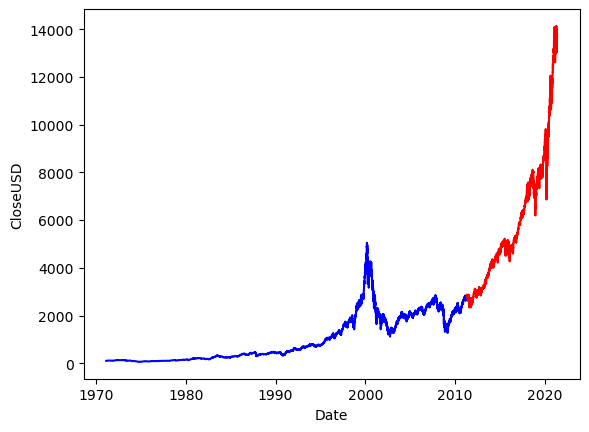

In [119]:
NUMBER_DATA_POINTS = 120

stock_data = stock_dfs['IXIC']
stock_data = pick_feature_columns(stock_data)

train_data, test_data = train_test_split(stock_data)
X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(train_data, 'b')
plt.plot(test_data, 'r')
ax.set_xlabel("Date")
ax.set_ylabel("CloseUSD")
plt.show()

In [120]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

lasso_model = Ridge()
paramters = {
    'alpha': [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
}

optimised_model = GridSearchCV(lasso_model, paramters)
optimised_model.fit(X_train, y_train)

print(optimised_model.best_estimator_)

Ridge(alpha=1, tol=0.1)


In [121]:
predictions = optimised_model.predict(X_test)
predictions = predictions.reshape(len(predictions), 1)

In [122]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE: ",mean_squared_error(y_test, predictions, squared=False))
print("R-squared: ", r2_score(y_test, predictions))

RMSE:  93.03434939018295
R-squared:  0.9988367999418107


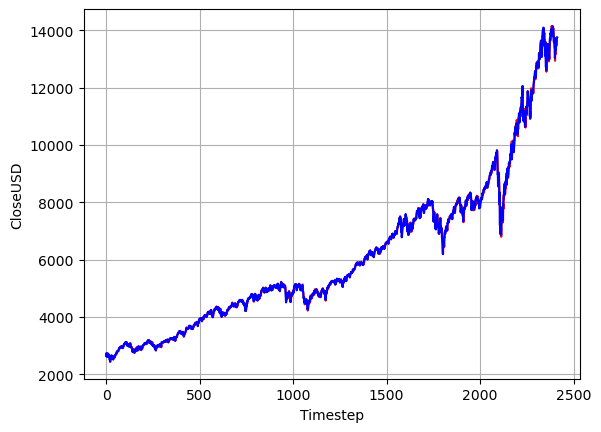

In [123]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(predictions, 'r')
plt.plot(y_test, 'b')
plt.grid(True)
ax.set_xlabel('Timestep')
ax.set_ylabel('CloseUSD')
plt.show()

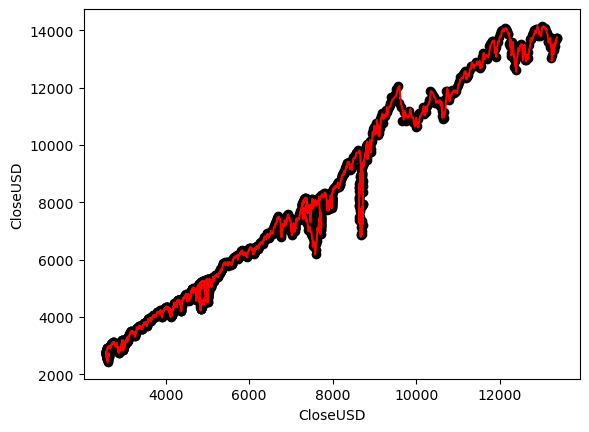

In [124]:
X_test_mean = X_test.mean(axis=1)
y_pred = optimised_model.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(X_test_mean, y_test, color='k')
plt.plot(X_test_mean, y_pred, color='r')
ax.set_xlabel('CloseUSD')
ax.set_ylabel('CloseUSD')
plt.show()

### Ridge Regression on All Stocks
This is running a ridge regression on all of the stocks in the data set, and finding the mean of all of the metrics that we have selected for our comparisons. We redefine `process_df` and `train_model` to include no scaling, and Ridge regression model respectively.

In [125]:
NUMBER_DATA_POINTS = 90

def process_df(df):
    df = pick_feature_columns(df)
    train_data, test_data = train_test_split(df)
    X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
    X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)
    return X_train, X_test, y_train, y_test, None

In [126]:
from sklearn.linear_model import Ridge

def train_model(X_train, y_train):
    model = Ridge(alpha=0.01, tol=0.1)
    model.fit(X_train, y_train)
    return model

In [127]:
performances = {}
for name, df in stock_dfs.items():
    X_train, X_test, y_train, y_test, scaler = process_df(df)
    model = train_model(X_train, y_train)
    predictions = model.predict(X_test)
    scores = score_model(scaler, y_test, predictions)
    performances[name] = scores

performances_df = pd.DataFrame.from_dict(data=performances, orient='index')
performances_df

,RMSE,R2,MAPE
000001.SS,5.568711,0.983566,0.008097
399001.SZ,25.867581,0.993227,0.010981
GDAXI,180.862667,0.986998,0.008966
GSPTSE,118.296062,0.990730,0.005993
HSI,39.877009,0.989544,0.008955
IXIC,92.297775,0.998865,0.008594
J203.JO,59.094518,0.982908,0.011205
N100,14.042543,0.979962,0.007618
N225,2.309612,0.998255,0.009643
NSEI,1.626185,0.990045,0.009985


In [129]:
performances_df.mean()

RMSE    58.776119
R2       0.990484
MAPE     0.008563
dtype: float64

# Linear Regression
For the first linear regression, I am repeating the same steps that I have previously done with Ridge regression, but with only one independent variable.

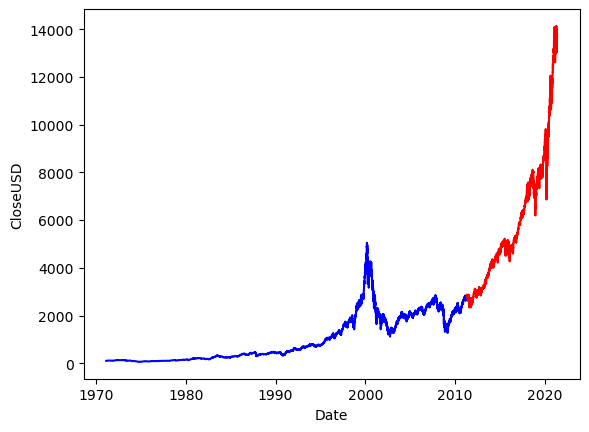

In [82]:
NUMBER_DATA_POINTS = 1

stock_data = stock_dfs['IXIC']
stock_data = pick_feature_columns(stock_data)

train_data, test_data = train_test_split(stock_data)
X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(train_data, 'b')
plt.plot(test_data, 'r')
ax.set_xlabel("Date")
ax.set_ylabel("CloseUSD")
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(n_jobs=1)
lr_model.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [85]:
predictions = lr_model.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE: ", mean_squared_error(y_test, predictions, squared=False))
print("R-squared: ", r2_score(y_test, predictions))

RMSE:  88.17380498719626
R-squared:  0.9989811781808735


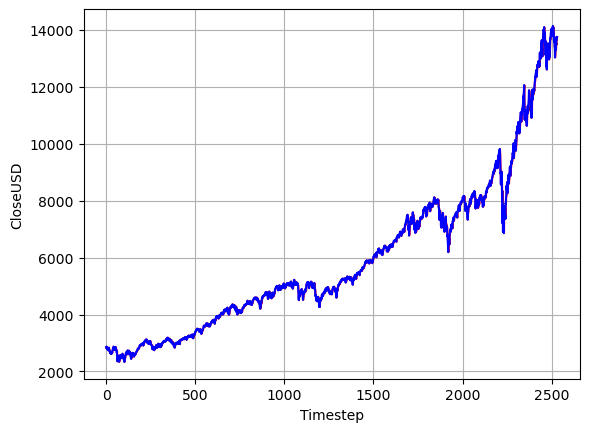

In [89]:
fig = plt.figure()
ax = fig.add_subplot()

plt.plot(predictions, 'r')
plt.plot(y_test, 'b')
plt.grid(True)
ax.set_xlabel('Timestep')
ax.set_ylabel('CloseUSD')
plt.show()

The graph below clearly shows a linear regression, as it creates a straight line (red line) to predict the data found in the test set (black dots).

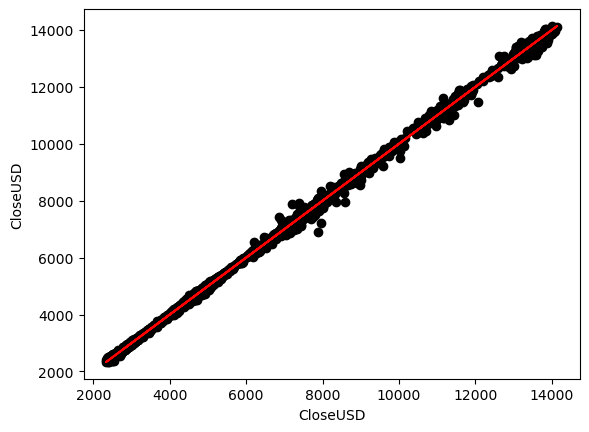

In [90]:
X_test_mean = X_test.mean(axis=1)
y_pred = lr_model.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(X_test_mean, y_test, color='k')
plt.plot(X_test_mean, y_pred, color='r')
ax.set_xlabel('CloseUSD')
ax.set_ylabel('CloseUSD')
plt.show()

### Multivariate Linear Regression
This attempt is similar to the others, but with 150 independent variables in a multiple linear regression.

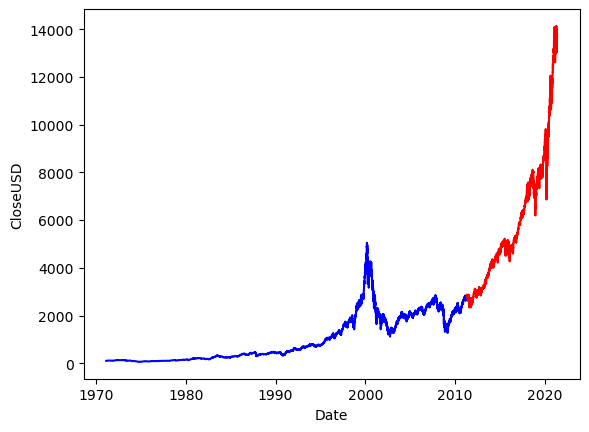

In [91]:
NUMBER_DATA_POINTS = 150

stock_data = stock_dfs['IXIC']
stock_data = pick_feature_columns(stock_data)

train_data, test_data = train_test_split(stock_data)
X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)

fig = plt.figure()
ax = fig.add_subplot()
plt.plot(train_data, 'b')
plt.plot(test_data, 'r')
ax.set_xlabel("Date")
ax.set_ylabel("CloseUSD")
plt.show()

In [92]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression(n_jobs=1)
mlr_model.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [93]:
predictions = mlr_model.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE: ", mean_squared_error(y_test, predictions, squared=False))
print("R-squared: ", r2_score(y_test, predictions))

RMSE:  93.9997856517354
R-squared:  0.9988026594998014


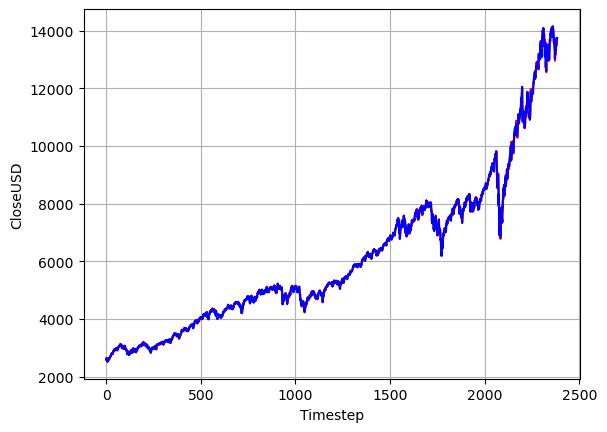

In [96]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(predictions, 'r')
plt.plot(y_test, 'b')
plt.grid(True)
ax.set_xlabel("Timestep")
ax.set_ylabel("CloseUSD")
plt.show()

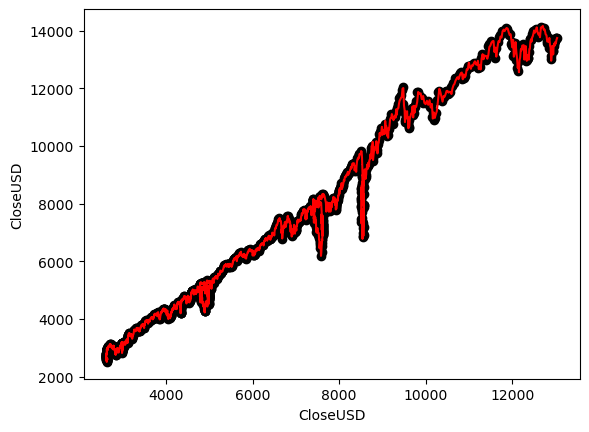

In [97]:
X_test_mean = X_test.mean(axis=1)
y_pred = mlr_model.predict(X_test)


fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(X_test_mean, y_test, color='k')
plt.plot(X_test_mean, y_pred, color='r')
ax.set_xlabel('CloseUSD')
ax.set_ylabel('CloseUSD')
plt.show()

### Linear Regression with Various Scalers
In this section, I try and determine if any of the scaling techniques have a noticable impact on the outcome of the model accuracy metrics. I try MinMaxScaler, StandardScaler, and no scaling. The result is that the scaling does not have any affect on the accuracy metrics of the model.

In [98]:
# No scaling
NUMBER_DATA_POINTS = 1

performances = {}
for name, df in stock_dfs.items():
    df = pick_feature_columns(df)
    
    train_data, test_data = train_test_split(df)
    X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
    X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)
    
    model = train_model(X_train, y_train)
    predictions = model.predict(X_test)
    scores = score_model(None, y_test, predictions)
    performances[name] = scores

performances_df = pd.DataFrame.from_dict(data=performances, orient='index')
performances_df

,RMSE,R2,MAPE
000001.SS,5.207203,0.984535,0.007422
399001.SZ,24.399412,0.993481,0.010161
GDAXI,176.208360,0.988906,0.008873
GSPTSE,112.249794,0.992314,0.005687
HSI,38.591924,0.989868,0.008599
IXIC,88.173805,0.998981,0.008391
J203.JO,53.868570,0.982804,0.010042
N100,13.369113,0.980984,0.007233
N225,2.249399,0.998369,0.009481
NSEI,1.534292,0.990467,0.009370


In [99]:
# Z-score scaling
NUMBER_DATA_POINTS = 1

performances = {}
for name, df in stock_dfs.items():
    df = pick_feature_columns(df)
    scaler, df = standard_scale_data(df)
    
    train_data, test_data = train_test_split(df)
    X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
    X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)
    
    model = train_model(X_train, y_train)
    predictions = model.predict(X_test)
    scores = score_model(scaler, y_test, predictions)
    performances[name] = scores

performances_df = pd.DataFrame.from_dict(data=performances, orient='index')
performances_df

,RMSE,R2,MAPE
000001.SS,5.207203,0.984535,0.007422
399001.SZ,24.399412,0.993481,0.010161
GDAXI,176.208360,0.988906,0.008873
GSPTSE,112.249794,0.992314,0.005687
HSI,38.591924,0.989868,0.008599
IXIC,88.173805,0.998981,0.008391
J203.JO,53.868570,0.982804,0.010042
N100,13.369113,0.980984,0.007233
N225,2.249399,0.998369,0.009481
NSEI,1.534292,0.990467,0.009370


In [100]:
# MinMax scaling
NUMBER_DATA_POINTS = 1

performances = {}
for name, df in stock_dfs.items():
    df = pick_feature_columns(df)
    scaler, df = min_max_scale_data(df)
    
    train_data, test_data = train_test_split(df)
    X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
    X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)
    
    model = train_model(X_train, y_train)
    predictions = model.predict(X_test)
    scores = score_model(scaler, y_test, predictions)
    performances[name] = scores

performances_df = pd.DataFrame.from_dict(data=performances, orient='index')
performances_df

,RMSE,R2,MAPE
000001.SS,5.207203,0.984535,0.007422
399001.SZ,24.399412,0.993481,0.010161
GDAXI,176.208360,0.988906,0.008873
GSPTSE,112.249794,0.992314,0.005687
HSI,38.591924,0.989868,0.008599
IXIC,88.173805,0.998981,0.008391
J203.JO,53.868570,0.982804,0.010042
N100,13.369113,0.980984,0.007233
N225,2.249399,0.998369,0.009481
NSEI,1.534292,0.990467,0.009370


### Multiple Linear Regression with Varying Number of Independent Variables
To determine how effective varying the amount of independent variables is on the accuracy of the model, I complete a simple/multi-variable linear regression and vary the amount of previous days data. The outcome is that it has little to no impact on the outcome.

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

number_of_points = [1, 10, 100]

for n in number_of_points:
    stock_data = stock_dfs['HSI']
    stock_data = pick_feature_columns(stock_data)
    scaler, stock_data = standard_scale_data(stock_data)

    train_data, test_data = train_test_split(stock_data)
    X_train, y_train = dependent_independent_split(train_data, n)
    X_test, y_test = dependent_independent_split(test_data, n)
    
    mlr_model = LinearRegression(n_jobs=-1)
    mlr_model.fit(X_train, y_train)
    
    predictions = mlr_model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    y_test_scaled = scaler.inverse_transform(y_test)
    
    print("n", n)
    print("\tRMSE: ", mean_squared_error(y_test_scaled, predictions, squared=False))
    print("\tR-squared: ", r2_score(y_test_scaled, predictions))
    print("\tMAPE", mean_absolute_percentage_error(y_test_scaled, predictions))

n 1
	RMSE:  38.59192379893607
	R-squared:  0.9898675367144897
	MAPE 0.008598626577077929
n 10
	RMSE:  38.704993200501576
	R-squared:  0.9898372139251329
	MAPE 0.008626589548112684
n 100
	RMSE:  39.99599612598562
	R-squared:  0.9895152059187595
	MAPE 0.008986855617274277


In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

all_scores = {}

for name, df in stock_dfs.items(): 
    scores = []
    for n in range(1, 50):
        stock_data = df
        stock_data = pick_feature_columns(stock_data)
        scaler, stock_data = standard_scale_data(stock_data)

        train_data, test_data = train_test_split(stock_data)
        X_train, y_train = dependent_independent_split(train_data, n)
        X_test, y_test = dependent_independent_split(test_data, n)

        mlr_model = LinearRegression(n_jobs=-1)
        mlr_model.fit(X_train, y_train)

        predictions = mlr_model.predict(X_test)
        predictions = scaler.inverse_transform(predictions)
        y_test_scaled = scaler.inverse_transform(y_test)

        scores.append(mean_squared_error(y_test_scaled, predictions, squared=False))
        
    all_scores[name] = scores

all_scores

{'000001.SS': [5.207203213176452,
  5.207876338212251,
  5.2275978907897995,
  5.226340639819202,
  5.277576999200233,
  5.280021503647499,
  5.265864093937313,
  5.265992973866548,
  5.26779588802831,
  5.2688222446083,
  5.273068579017929,
  5.270261398375059,
  5.280267931631626,
  5.304062362689308,
  5.296048519832042,
  5.328784844554697,
  5.3254672103221985,
  5.327858697384556,
  5.329783117078929,
  5.342078096929587,
  5.34398650059776,
  5.346465021298486,
  5.348244794869547,
  5.353501856876941,
  5.35122357510901,
  5.3544014860616995,
  5.353735714321316,
  5.355460524805396,
  5.359870738028348,
  5.359873712286515,
  5.37554889024042,
  5.383916241847361,
  5.386666034246736,
  5.390707447532239,
  5.406893380402826,
  5.406514031043423,
  5.407677093077081,
  5.432453939083319,
  5.435107160253927,
  5.444852883468148,
  5.446456593758157,
  5.44524956707479,
  5.444421761734716,
  5.446842848413621,
  5.457546333177123,
  5.4619869526435085,
  5.463731673181402,
  5

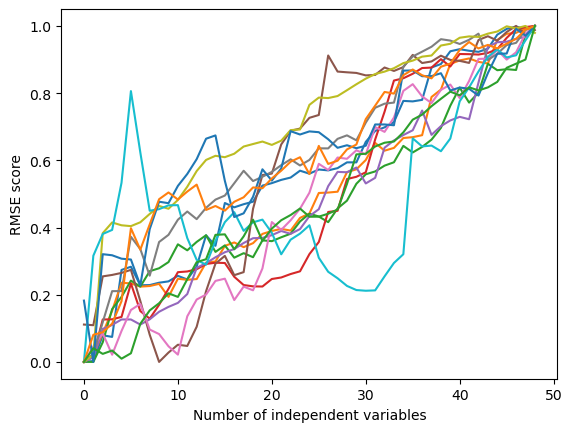

In [62]:
from sklearn.preprocessing import minmax_scale

fig = plt.figure()
ax = fig.add_subplot()

for _, score in all_scores.items():
    score = minmax_scale(score)
    plt.plot(score)

ax.set_xlabel("Number of independent variables")
ax.set_ylabel("RMSE score")
plt.show()

### Multiple Linear Regression on All Stocks
This is to collect the mean of all the accuracy metrics for a mutli-varable linear regression.

In [71]:
NUMBER_DATA_POINTS = 90

def process_df(df):
    df = pick_feature_columns(df)
    train_data, test_data = train_test_split(df)
    X_train, y_train = dependent_independent_split(train_data, NUMBER_DATA_POINTS)
    X_test, y_test = dependent_independent_split(test_data, NUMBER_DATA_POINTS)
    return X_train, X_test, y_train, y_test, None

In [72]:
performances = {}
for name, df in stock_dfs.items():
    X_train, X_test, y_train, y_test, scaler = process_df(df)
    model = train_model(X_train, y_train)
    predictions = model.predict(X_test)
    scores = score_model(None, y_test, predictions)
    performances[name] = scores

performances_df = pd.DataFrame.from_dict(data=performances, orient='index')
performances_df

,RMSE,R2,MAPE
000001.SS,5.568711,0.983566,0.008097
399001.SZ,25.867581,0.993227,0.010981
GDAXI,180.862667,0.986998,0.008966
GSPTSE,118.296062,0.990730,0.005993
HSI,39.877009,0.989544,0.008955
IXIC,92.297776,0.998865,0.008594
J203.JO,59.094518,0.982908,0.011205
N100,14.042543,0.979962,0.007618
N225,2.309612,0.998255,0.009643
NSEI,1.626187,0.990045,0.009985


In [73]:
performances_df.mean()

RMSE    58.776120
R2       0.990484
MAPE     0.008563
dtype: float64